# Домашняя работа №2

### Загрузка данных и первичный осмотр

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('../../homeworks/HW02/S02-hw-dataset.csv')
df.head(10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### Пропуски, дубликаты и базовый контроль качества

In [5]:
print('Доля пропусков в столбце "user_id":', df['user_id'].isna().mean())
print('Доля пропусков в столбце "age":', df['age'].isna().mean())
print('Доля пропусков в столбце "purchases":', df['purchases'].isna().mean())
print('Доля пропусков в столбце "revenue":', df['revenue'].isna().mean())

Доля пропусков в столбце "user_id": 0.0
Доля пропусков в столбце "age": 0.04878048780487805
Доля пропусков в столбце "purchases": 0.0
Доля пропусков в столбце "revenue": 0.0


In [6]:
print('Количество полностью дублирующихся строк:', df.duplicated().sum())

Количество полностью дублирующихся строк: 1


In [7]:
print('Количество повторяющихся user_id:', df.user_id.duplicated().sum())

Количество повторяющихся user_id: 1


In [8]:
print('Количество пользователей с возрастом более 100 лет:', len(df[df.age > 100]))
print('Количество пользователей с возрастом менее 14 лет:', len(df[df.age < 14]))
print('Количество пропусков в столбце "age":', df['age'].isna().sum())

Количество пользователей с возрастом более 100 лет: 1
Количество пользователей с возрастом менее 14 лет: 1
Количество пропусков в столбце "age": 2


In [9]:
df.country.unique()

array(['FR', 'RU', 'DE', 'CN', 'US'], dtype=object)

In [10]:
print('Количестов строк с отрицательным количеством покупок:', len(df[df.purchases < 0]))

Количестов строк с отрицательным количеством покупок: 1


In [11]:
print('Прибыль меньше или равна нулю при положительных покупках (кол):', len(df[(df.revenue <= 0) & (df.purchases > 0)]))

Прибыль меньше или равна нулю при положительных покупках (кол): 1


In [12]:
print('Прибыль положительна при нулевых покупках (кол):', len(df[(df.revenue > 0) & (df.purchases == 0)]))

Прибыль положительна при нулевых покупках (кол): 0


Проблемы в исходных данных:
1) пропуски в столбце "age" (4.87%, 2 шт)
2) полностью дублирующиеся строки (1 шт)
3) повторы в "user_id" (1 шт)
4) некорректный возраст (более 100 лет и менее 14 лет) (2 шт)
5) отрицательное количество покупок (1 шт)
6) некорректная прибыль (1 шт)

### Базовый EDA: группировки, агрегаты и частоты

In [13]:
df_clean = df.drop_duplicates().copy()
df_clean = df_clean.dropna(subset=['age'])
df_clean = df_clean[(df_clean['age'] <= 100) & (df_clean['age'] >= 14)]
df_clean = df_clean[(df_clean.revenue > 0) & (df_clean.purchases > 0)]
cuted=pd.cut(df_clean['age'], 3 ,labels=['Молодые', 'Средних лет', 'Пожилые'], include_lowest=True)
df_clean['age_group'] = cuted
df_clean

,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,Молодые
1,2,24.0,RU,5,1115,Молодые
2,3,52.0,FR,7,399,Пожилые
3,4,31.0,RU,6,654,Молодые
7,8,28.0,CN,2,456,Молодые
8,9,39.0,US,4,980,Средних лет
9,10,24.0,RU,7,511,Молодые
11,12,20.0,CN,7,1652,Молодые
13,14,36.0,DE,9,2358,Средних лет
14,15,57.0,FR,7,693,Пожилые


In [14]:
df_clean.country.value_counts()

country
FR    10
RU     9
US     6
DE     5
CN     2
Name: count, dtype: int64

In [15]:
country_revenue = df_clean.groupby('country')['revenue'].sum()
print("Суммарная прибыль по странам:")
country_revenue

Суммарная прибыль по странам:


country
CN    2108
DE    7377
FR    7326
RU    8272
US    3829
Name: revenue, dtype: int64

In [16]:
country_purchases = df_clean.groupby('country')['purchases'].sum()
print("Суммарное количество покупок по странам:")
country_purchases

Суммарное количество покупок по странам:


country
CN     9
DE    33
FR    52
RU    47
US    24
Name: purchases, dtype: int64

In [17]:
age_sales = df_clean.groupby('age_group', observed=False)['revenue'].sum()
print("Суммарная прибыль по возрастным группам:")
age_sales

Суммарная прибыль по возрастным группам:


age_group
Молодые         9041
Средних лет    14015
Пожилые         5856
Name: revenue, dtype: int64

In [18]:
country_purchases = df_clean.groupby('age_group', observed=False)['purchases'].sum()
print("Суммарное количество покупок по возрастным группам:")
country_purchases

Суммарное количество покупок по возрастным группам:


age_group
Молодые        59
Средних лет    65
Пожилые        41
Name: purchases, dtype: int64

По результатам анализа больше всего покупок совершают пользователи из Франции (10 человек). Однако наибольшую прибыль приносят покупатели из России (на 946 больше, чем Франция).
Наиболее активной возрастной группой являются клиенты "средних лет". "Молодые показывают средние показатели", "пожилые" - наимень

### Визуализация данных в Matplotlib

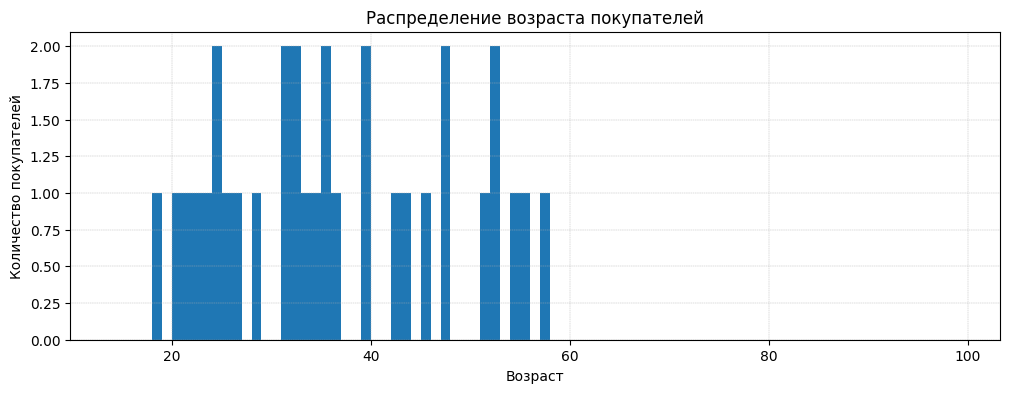

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(df_clean['age'], bins=np.arange(14, 100))
ax.grid(linestyle='--', linewidth=0.3)
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество покупателей')
ax.set_title('Распределение возраста покупателей')
plt.savefig('../../homeworks/HW02/figures/age_payer.png')
plt.show()

Показано распределение возраста покупателей (сколько покупателей какого возраста). Можно сделать вывод, что основная аудитория находится в диапазоне от 20 до 40 лет, причем большая часть покупателей 30-ти лет. После 40 количество покупателей резко уменьшается.

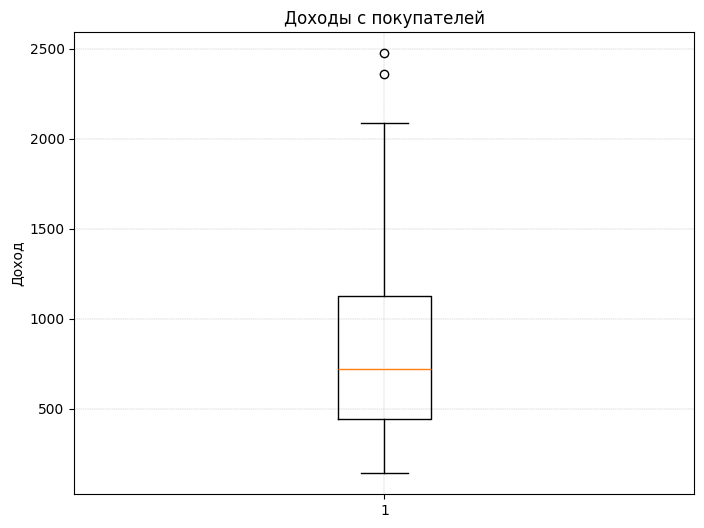

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(df_clean['revenue'])
ax.set_ylabel('Доход')
ax.set_title('Доходы с покупателей')
ax.grid(linestyle='--', linewidth=0.3)
plt.savefig('../../homeworks/HW02/figures/revenue_payer.png')

plt.show()

График показывает распределение доходов с покупателей. Распрелеоение асимметричное. Присутствует много небольших значений (ящик внизу), но разброс значений широкий. Есть два выброса.

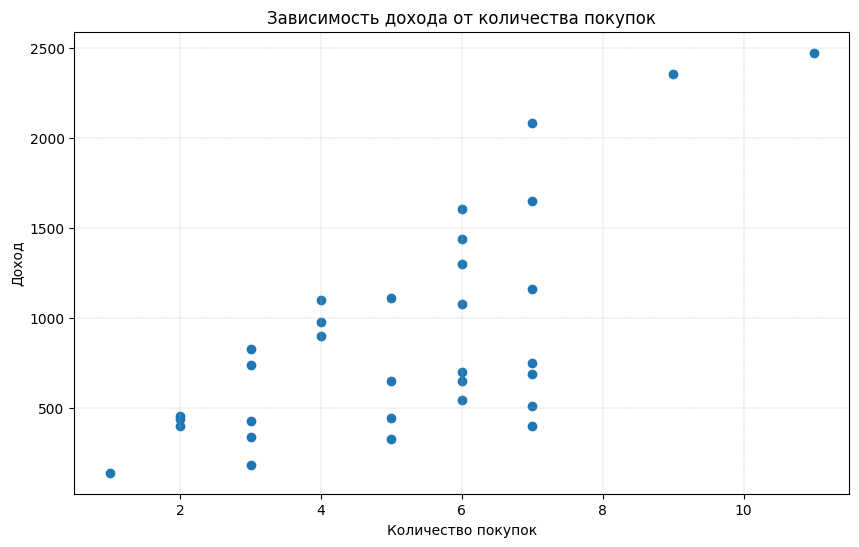

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_clean['purchases'],df_clean['revenue'])
ax.set_xlabel('Количество покупок')
ax.set_ylabel('Доход')
ax.set_title('Зависимость дохода от количества покупок')
ax.grid(linestyle='--', linewidth=0.3)
plt.savefig('../../homeworks/HW02/figures/revenue_purchases.png')

plt.show()

Показана зависимость дохода от количества покупок, которое совершает клиент. Можно сказать, что здесь прямая линейная зависимость, что и ожидалось. Однако можно заметить, что много точек находятся "ниже прямой". Значит люди покупают много дешевых товаров.